# Exploration
This notebook conducts data exploration of the KM3NeT dataset. The following aspects of the dataset are explored:

- DONE descriptive statistics
- DONE NAN/NULL check
- DONE correlations
- TODO distributions of individual features
- TODO interesting plots (still thinking about this...)
- TODO timeseries specific visualizations
- TODO 3 dimensional data visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

In [4]:
data = pd.read_csv("../data/data.csv")

# Descriptive statistics
We start nice and simple with descriptive statistics of the entire dataset.

- total count: 45820220 (~45 million rows)
- dom_id range: 1 - 2070
- pmt_id range: 1 - 31 (id shared amongst DOMs)
- TODO what is the unit of pos_x,y,z?
- distribution of pos_x,y,z (std and mean) more or less the same
- TODO what does dir_x,y,z signify?
- TODO unit of tot?
- (min, max) time is (0, 1.01e+08) but mean is 5.0e+07, we have more datapoints later in time.

In [5]:
data.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
count,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07
mean,1.035732e+03,1.601316e+01,1.168440e-02,-1.597919e-02,1.171977e+02,2.011426e-04,-5.647887e-05,-1.950327e-01,2.643196e+01,5.005158e+07,1.069192e-02
std,5.975225e+02,8.942257e+00,5.125232e+01,6.222670e+01,4.865413e+01,5.809819e-01,5.810460e-01,5.354773e-01,2.626465e+00,2.891125e+07,1.028475e-01
min,1.000000e+00,1.000000e+00,-9.462700e+01,-1.156000e+02,3.770000e+01,-9.550000e-01,-9.550000e-01,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.180000e+02,8.000000e+00,-4.501800e+01,-5.792500e+01,7.404100e+01,-4.780000e-01,-4.780000e-01,-5.560000e-01,2.500000e+01,2.500466e+07,0.000000e+00
50%,1.036000e+03,1.600000e+01,1.309000e+00,-4.184000e+00,1.217000e+02,0.000000e+00,-0.000000e+00,-2.960000e-01,2.600000e+01,5.004292e+07,0.000000e+00
75%,1.553000e+03,2.400000e+01,4.045200e+01,4.854100e+01,1.602410e+02,4.780000e-01,4.780000e-01,2.960000e-01,2.800000e+01,7.509229e+07,0.000000e+00
max,2.070000e+03,3.100000e+01,9.624300e+01,1.050240e+02,1.966110e+02,9.550000e-01,9.550000e-01,5.580000e-01,2.090000e+02,1.015914e+08,1.000000e+00


# NAN/NULL check
Make sure we do not have any NAN/NULL values in the dataset.

In [7]:
data.isna().any().any()

False

# Correlations
Check the correlations between the features. The standard "Pearson" correlation is used.

- No significant correlations are observed between pos_x,y,z dir_x,y,z tot and time. This already tells us that standard ML models will not work on the dataset, we need deep learning models to extract information.
- dom_id is (strongly) positively correlated with pos_x and negatively correlated with pos_y
- dir_y negatively correlated with pmt_id and dir_z (strongly) positively correlated with pmt_id

In [10]:
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
dom_id,1.00,0.00,0.77,-0.32,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00
pmt_id,0.00,1.00,-0.00,-0.00,0.00,-0.03,-0.14,0.97,-0.00,0.00,0.00
pos_x,0.77,-0.00,1.00,-0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
pos_y,-0.32,-0.00,-0.01,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
pos_z,-0.01,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
dir_x,-0.00,-0.03,0.00,0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00
dir_y,-0.00,-0.14,-0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,-0.00
dir_z,-0.00,0.97,-0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,0.00
tot,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,1.00,0.00,-0.01
time,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,1.00,-0.00


# Distributions
Now we consider the distributions of individual  features.

## label
Looking at the histogram of label we can see a huge class imbalance between events and noise data. To be precise, we only have 489906 events vs. 45330310 noise datapoints. An effective stratergy to handle class imbalance will need to be deviced during training.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114aa0240>]],
      dtype=object)

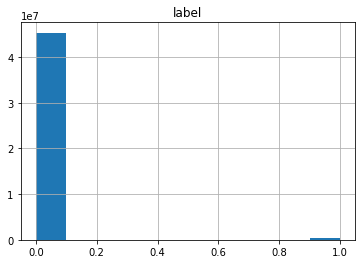

In [11]:
data.hist(column='label')

In [13]:
print("# noise: {0}, # events: {1}".format(len(data[data.label == 0]), len(data[data.label == 1])))

# noise: 45330310, # events: 489906


## pos_x/y/z
Next we look at the distributions of the pos_x/y/z features. At this point, the dataset is too large to create plots. As an alternate, we only look at the largest timeslice.

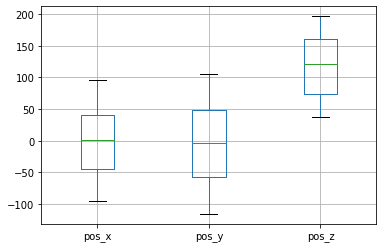

In [35]:
# This is the only plot that can be created using the entire dataset
pd.plotting.boxplot(data, column=['pos_x', 'pos_y', 'pos_z'])

In [ ]:
# TODO figure out how to plot this
pd.plotting.scatter_matrix(data[['pos_x', 'pos_y', 'pos_z']])

In [43]:
data[['pos_x', 'pos_y', 'pos_z']].plot()